참고 사이트: https://uoahvu.tistory.com/entry/GraphRAG-Neo4j-DB%EC%99%80-LangChain-%EA%B2%B0%ED%95%A9%EC%9D%84-%ED%86%B5%ED%95%9C-%EC%A7%88%EC%9D%98%EC%9D%91%EB%8B%B5-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0-Kaggle-CSV-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0

## Data PreProcessing

In [58]:
import pandas as pd

df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [60]:
df['Summary'].head(10)

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [61]:
# csv 파일인데 콤마, 따옴표로 인해 에러가 발생해서 그냥 테스트용이니 빠르게 제거해서 에러 해결
df['Summary'] = df['Summary'].apply(lambda x: str(x).replace(',', '').replace('"', '').replace("'", ""))
df['Text'] = df['Text'].apply(lambda x: str(x).replace(',', '').replace('"', '').replace("'", ""))
df['ProfileName'] = df['ProfileName'].apply(lambda x: str(x).replace(',', '').replace('"', '').replace("'", ""))

In [62]:
df['Summary'].head(10) # 따옴표, 콤마 없어진 것을 확인 가능

0                            Good Quality Dog Food
1                                Not as Advertised
2                              Delight says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                            Wonderful tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [64]:
# 약 50만개의 데이터를 다 저장할 수 없으니(시도해봤으나 Desktop에서 한도 초과로 에러남) 20% 정도인 10만개만 추출
df_split = df.iloc[:100000]

In [65]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      100000 non-null  int64 
 1   ProductId               100000 non-null  object
 2   UserId                  100000 non-null  object
 3   ProfileName             100000 non-null  object
 4   HelpfulnessNumerator    100000 non-null  int64 
 5   HelpfulnessDenominator  100000 non-null  int64 
 6   Score                   100000 non-null  int64 
 7   Time                    100000 non-null  int64 
 8   Summary                 100000 non-null  object
 9   Text                    100000 non-null  object
dtypes: int64(5), object(5)
memory usage: 7.6+ MB


In [66]:
df_split.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,Natalia Corres Natalia Corres,1,1,4,1219017600,Delight says it all,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,Michael D. Bigham M. Wassir,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [67]:
df_split.to_csv("Reviews_subset.csv")

### 예시 Cypher 쿼리로 사용할 ProductID 찾기
- Graph 구조를 그래도 확인하려면 연관성이 많은(review가 많이 연결된) Product를 고르는게 좋아보임
- 리뷰가 100개 이하로 있는 ProductId를 찾기 위해 value_counts를 사용

In [76]:
df[df['ProductId'] == 'B0026RQTGE']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
74631,74632,B0026RQTGE,A21U4DR8M6I9QN,K. M Merrill justine,1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
74632,74633,B0026RQTGE,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,These are genuine Greenies product not a knock...
74633,74634,B0026RQTGE,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,Our dogs love Greenies but of course which dog...
74634,74635,B0026RQTGE,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,What can I say dogs love greenies. They begg f...
74635,74636,B0026RQTGE,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
75258,75259,B0026RQTGE,A3OIE7IE9LTPJG,GatorMan,1,1,5,1319673600,Great Bundle will last forever for small dog.,Make sure you have a small dog...Big Dogs migh...
75259,75260,B0026RQTGE,A1HZIWB1RGW7RM,Danny Knowles,1,1,5,1319673600,Greenies,These are the best things since sliced bread. ...
75260,75261,B0026RQTGE,A1Q5SEO5O6E0L4,brendab,1,1,5,1319673600,my dog loves these,My dog loves these. I received a sample at th...
75261,75262,B0026RQTGE,AFMF7YL0PKFIM,Jan,1,1,5,1319068800,Greenies Dental Chews -Teenies,Oh my gosh we cannot be without Greenies at ou...


In [95]:
product_review_rank = pd.DataFrame(df_split['ProductId'].value_counts())
product_review_rank.head()

,count
ProductId,
B0026RQTGE,632
B002QWP89S,632
B007M83302,564
B0013NUGDE,564
B000KV61FC,556


In [96]:
product_review_rank.iloc[300]

count    50
Name: B002RU3GH0, dtype: int64

```
MATCH (p:Product)-[:REVIEW]->(r:Review)<-[:WROTE]-(u:UserID)
WHERE p.ProductId = 'B002RU3GH0'
RETURN p, u, r
LIMIT 100
```

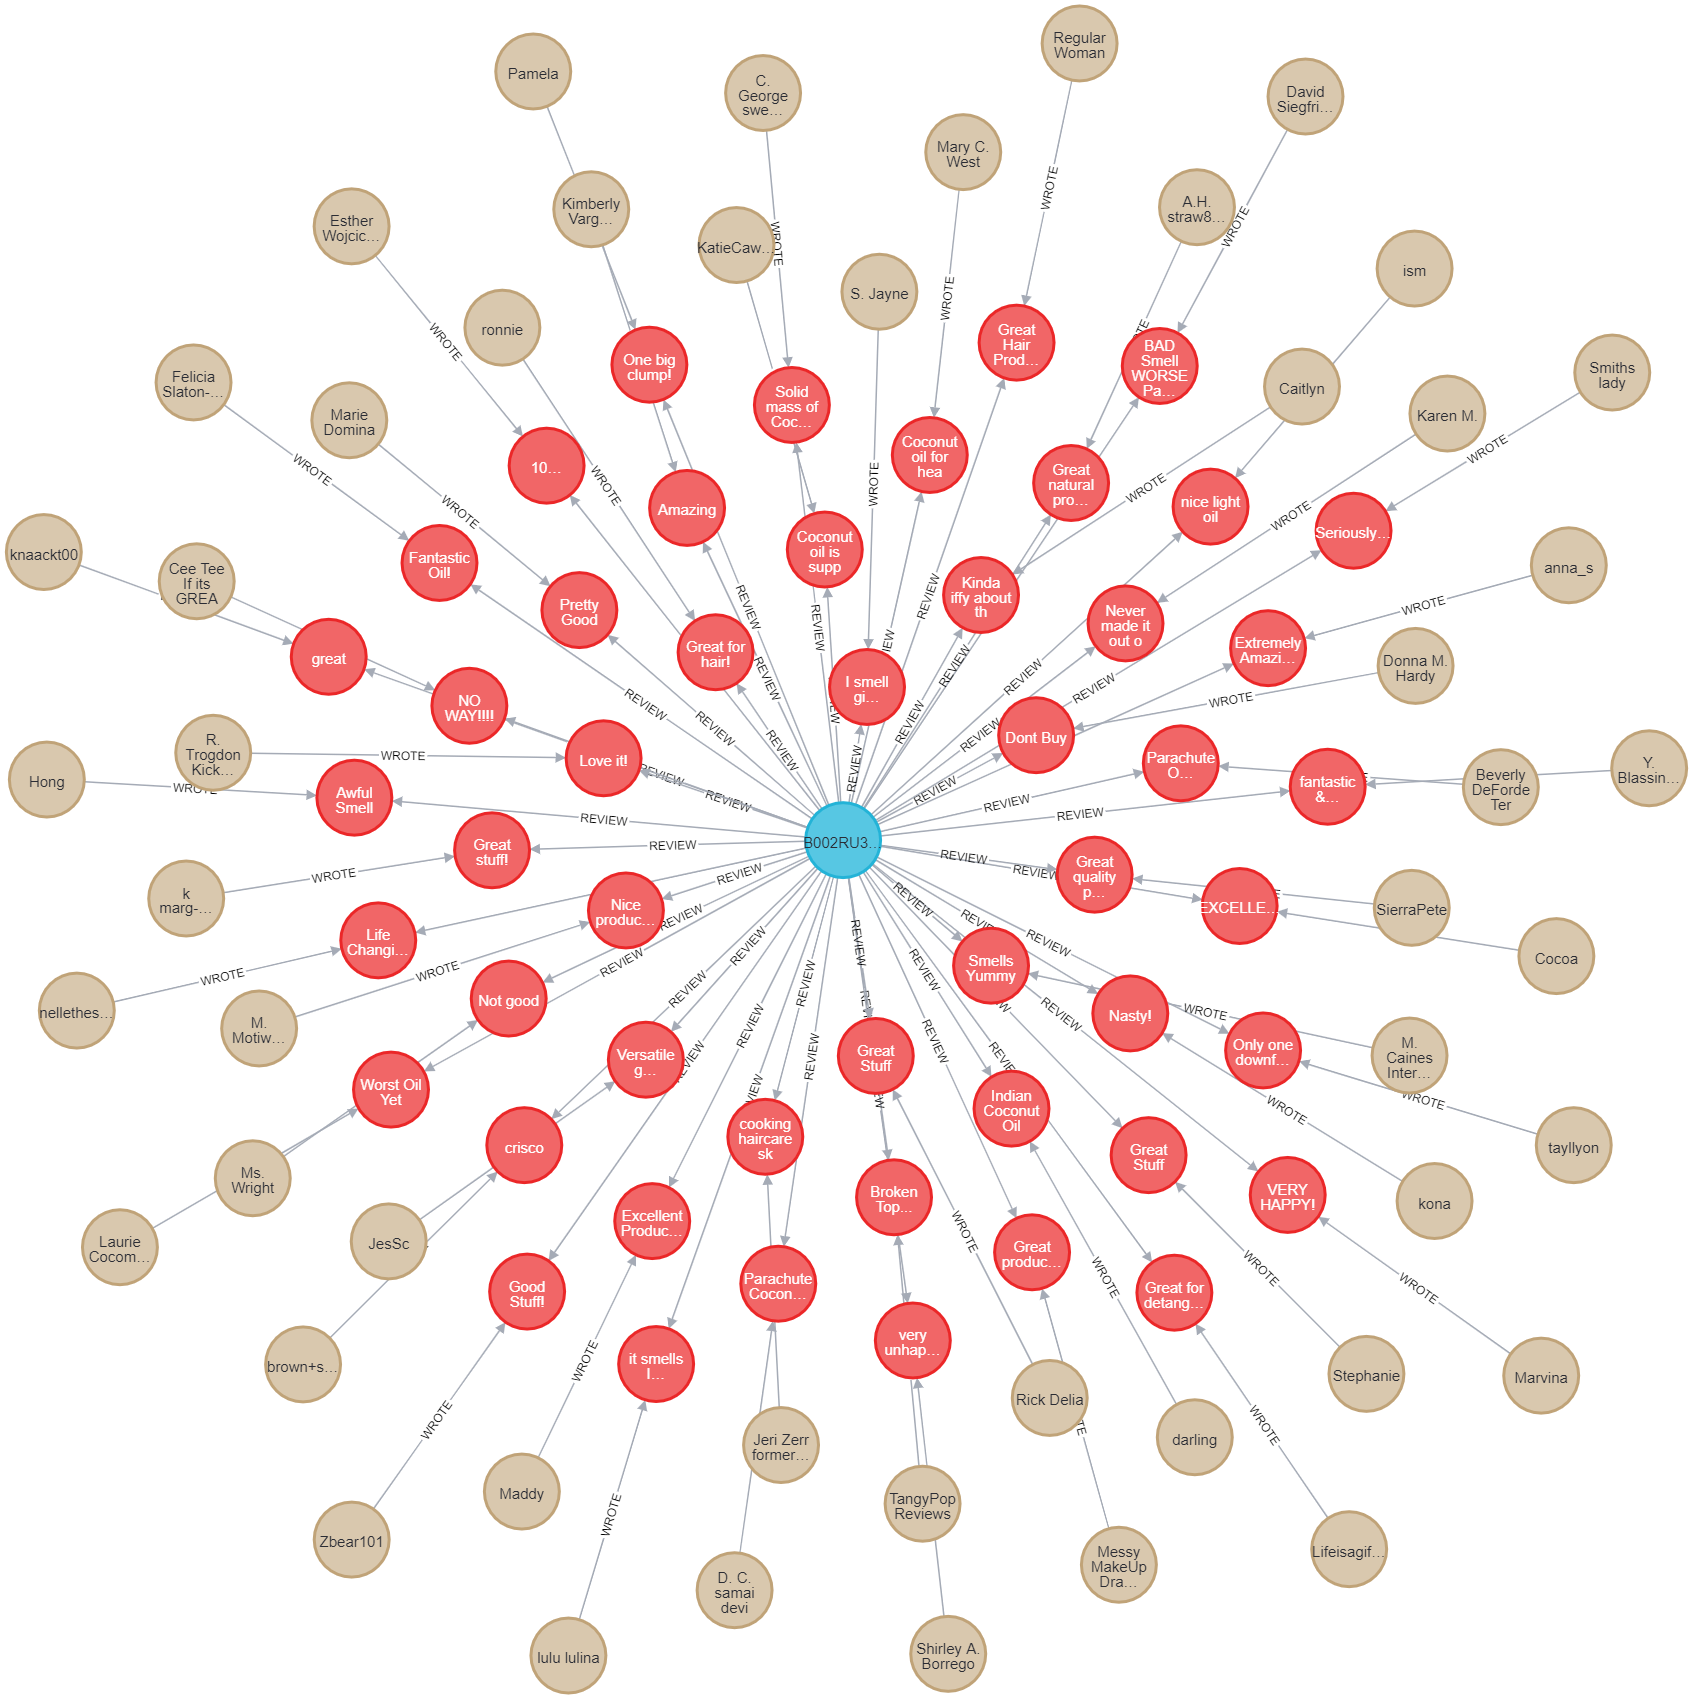

## GraphRAG

In [89]:
from langchain_community.graphs.neo4j_graph import Neo4jGraph
from langchain.chains import GraphCypherQAChain
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

CYPHER_GENERATION_TEMPLATE = """Task:Generate Cypher statement to query a graph database.
Instructions:
Use only the provided relationship types and properties in the schema.
Do not use any other relationship types or properties that are not provided.
Schema:
{schema}
Note: Do not include any explanations or apologies in your responses.
Do not respond to any questions that might ask anything else than for you to construct a Cypher statement.
Do not include any text except the generated Cypher statement.

The question is:
{question}"""
CYPHER_GENERATION_PROMPT = PromptTemplate(
    input_variables=["schema", "question"], template=CYPHER_GENERATION_TEMPLATE
)

In [90]:
CYPHER_QA_TEMPLATE = """You are an assistant that helps to form nice and human understandable answers.
The information part contains the provided information that you must use to construct an answer.
The provided information is authoritative, you must never doubt it or try to use your internal knowledge to correct it.
Make the answer sound as a response to the question. Do not mention that you based the result on the given information.
Here is an example:

Question: Which managers own Neo4j stocks?
Context:[manager:CTL LLC, manager:JANE STREET GROUP LLC]
Helpful Answer: CTL LLC, JANE STREET GROUP LLC owns Neo4j stocks.

Follow this example when generating answers.
If the provided information is empty, say that you don't know the answer.
Information:
{context}

Question: {question}
Helpful Answer:"""
CYPHER_QA_PROMPT = PromptTemplate(
    input_variables=["context", "question"], template=CYPHER_QA_TEMPLATE
)

In [91]:
graph = Neo4jGraph(url="bolt://localhost:7687", username='neo4j', password='neo4j1234')

In [92]:
chain = GraphCypherQAChain.from_llm(
    ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY),
    graph=graph,
    verbose=True
)

In [93]:
chain.run("How many reviews does the B002RU3GH0 product have?")

C:\Users\kidong\AppData\Local\Temp\ipykernel_20296\2097097731.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  chain.run("How many reviews does the B002RU3GH0 product have?")




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (:Product {ProductId: 'B002RU3GH0'})-[:REVIEW]->(r:Review)
RETURN COUNT(r) as NumberOfReviews;
Full Context:
[{'NumberOfReviews': 50}]

> Finished chain.


'The B002RU3GH0 product has 50 reviews.'

In [97]:
user_rank = pd.DataFrame(df_split['ProfileName'].value_counts())
user_rank.head()

,count
ProfileName,
Gary Peterson,88
C. F. Hill CFH,79
Chris,72
Gunner,67
Rebecca of Amazon The Rebecca Review,64


In [98]:
user_rank.iloc[300]

count    13
Name: Ken, dtype: int64

In [99]:
# Ken이라는 이름으로 작성된 리뷰는 총 13개
chain.run("How many reviews has user Ken written?")



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (:UserID {ProfileName: 'Ken'})-[:WROTE]->(r:Review)
RETURN COUNT(r);
Full Context:
[{'COUNT(r)': 13}]

> Finished chain.


'Ken has written 13 reviews.'

In [100]:
# 동명이인은 총 11명 있는데 이에 맞게 출력되는 것을 확인 가능(2명의 Ken은 2개의 리뷰를 작성하고 나머지 Ken들은 1명당 1개씩 리뷰를 작성한 상태)
chain.run("How many different people whose name is Ken exist?")



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (u:UserID {ProfileName: 'Ken'})-[:WROTE]->(:Review)
RETURN COUNT(DISTINCT u)
Full Context:
[{'COUNT(DISTINCT u)': 11}]

> Finished chain.


'There are 11 different people whose name is Ken.'

```
MATCH (u:UserID)-[:WROTE]->(r:Review)<-[:REVIEW]-(p:Product)
WHERE u.ProfileName = 'Ken'
RETURN p, u, r
LIMIT 100
```

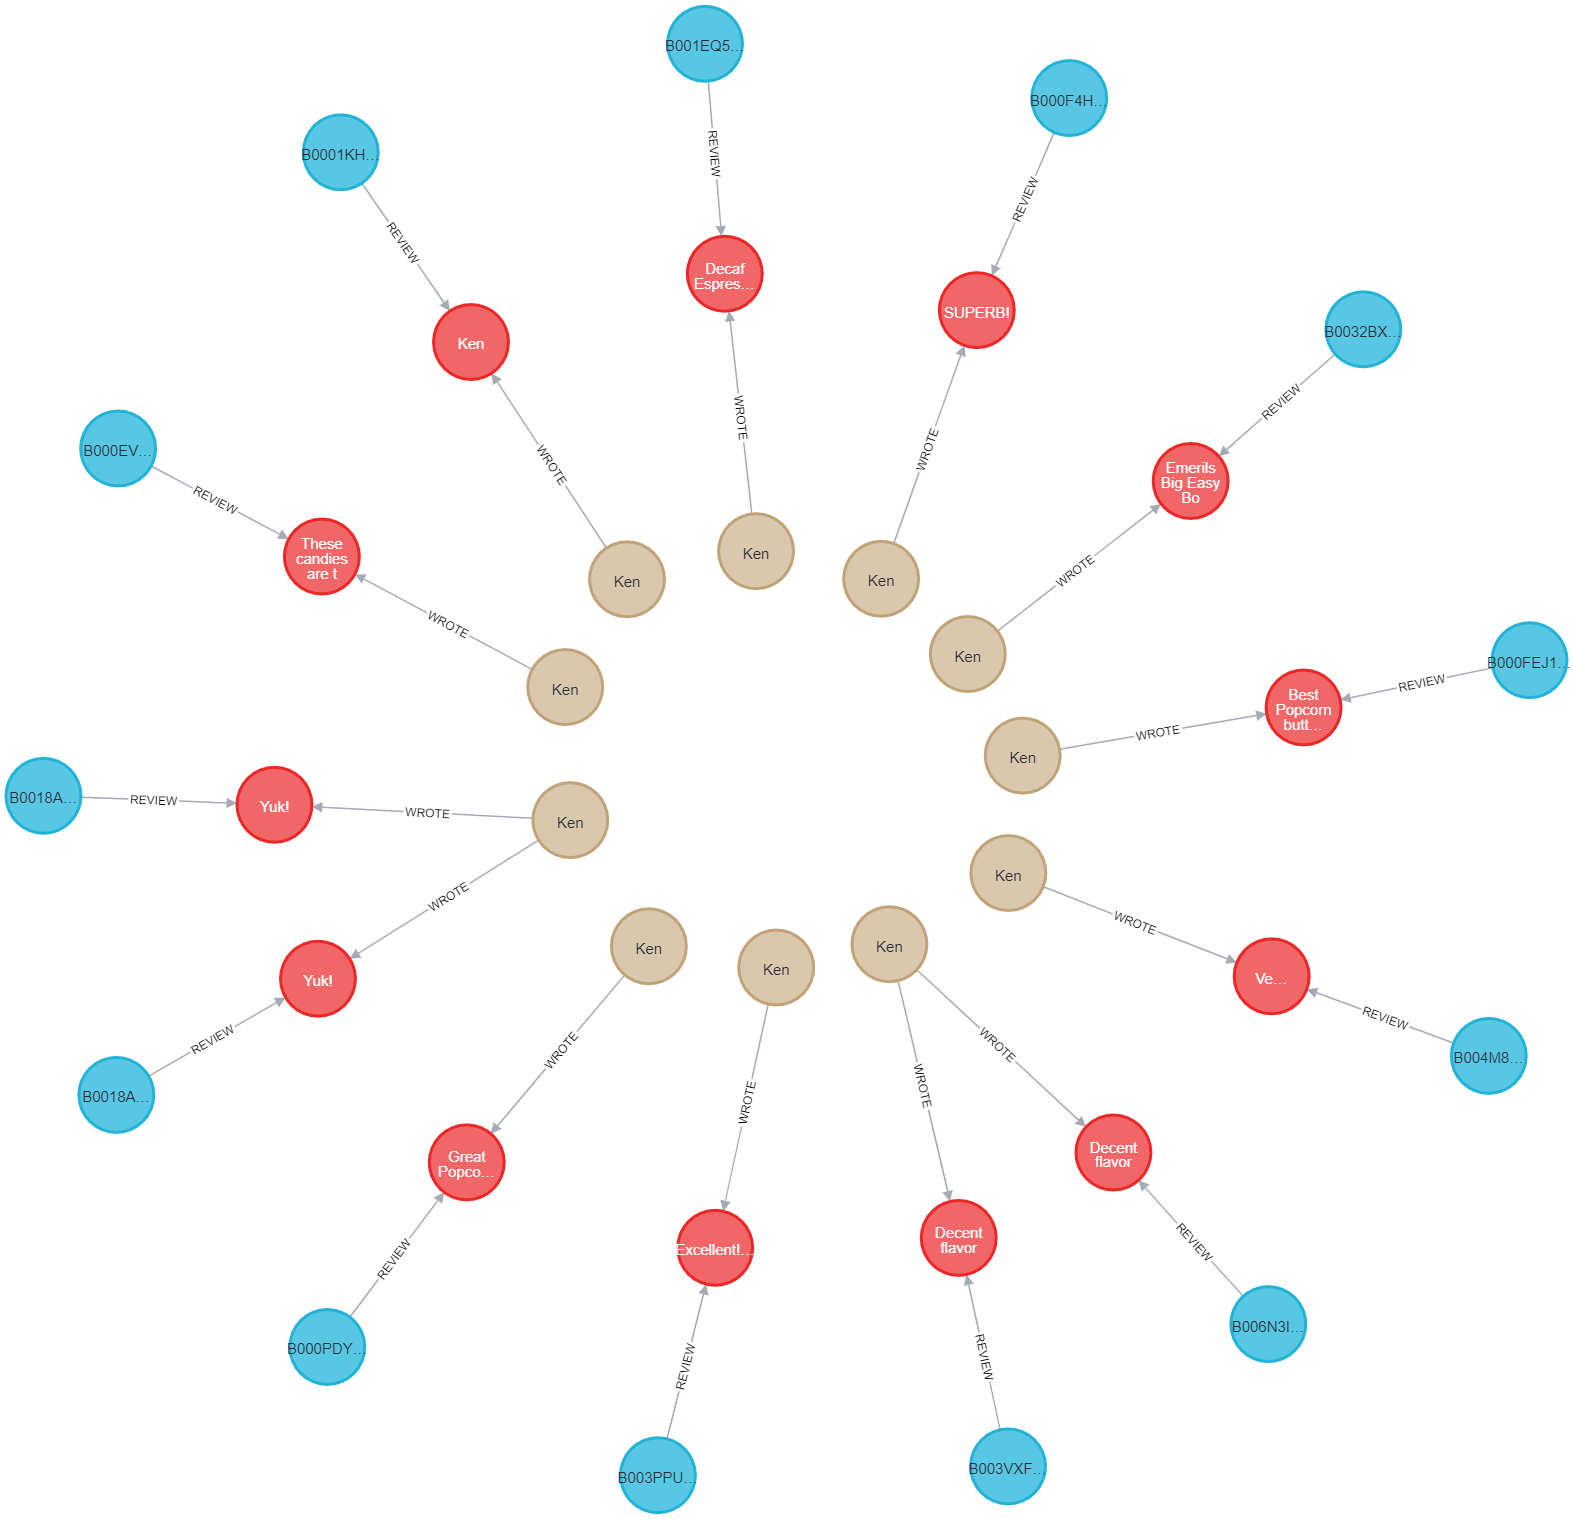

In [103]:
# 해당 제품에 달린 리뷰들을 요약해달라는 질문에 통합적인 요약을 해주는 것을 확인할 수 있다
chain.run("Please summarize the review text for the B002RU3GH0 product.")



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Product {ProductId: 'B002RU3GH0'})-[:REVIEW]->(r:Review)
RETURN r.Summary as Summary, r.Text as Text
Full Context:
[{'Summary': 'Good Stuff!', 'Text': 'I factually ordered this in to mix with neem oil for my sons acne. Didnt realize it was also edible. lol!  Works great with the neem to take out the stink.  Ive been looking for natural handlings for his acne and these are working for him.<br /><br />Anyhow I used it to whip up some scrambled eggs; delicious! I will use this for other cooking!!!<br /><br />I also somehow acquired a spider bite on my forehead and I heard coconut oil is good for that so I put a little on that and voila the pain was gone and it shrunk down and disappeared faster than I have ever had a spider bite disappear.  Tried it on a mosquito bite too.  Took the itch away (I get quite the reaction from mosquito bites) and the swelling disappeared as did the mosquito bite by the next day.<br /><br 

'The review text for the B002RU3GH0 product includes positive feedback about using coconut oil for cooking, skincare, and haircare, as well as some negative comments about the smell and difficulty in getting the oil out of the container.'

In [104]:
# 5점 평점을 가장 많이 받은 제품을 알려달라는 질문에 대한 응답
chain.run("Which product ID has the most 5-score reviews?")



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Product)-[:REVIEW]->(r:Review)
WHERE r.Score = 5
RETURN p.ProductId, COUNT(r) AS FiveStarReviews
ORDER BY FiveStarReviews DESC
LIMIT 1;
Full Context:
[{'p.ProductId': 'B002QWP89S', 'FiveStarReviews': 498}]

> Finished chain.


'B002QWP89S has the most 5-score reviews.'